# U.S. Medical Insurance Costs

In [74]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('insurance.csv')

In this project, I plan to analyze the correlation between the age, sex, bmi, smoker, region and the charges. This analysis will include:

The data broken down into 4 different regions: northeast, northwest, southeast, southwest

The difference in average medical insurance cost between smokers and non-smokers

The average insurance cost of different age groups: youths: 18-24 years old, young adults: 25-35 adults: 35–55 years old, and elderly: > 55 years old

The relationship between the number of children and BMI. BMI Scale: underweight: < 18.5, ideal: 18.5 - 24.9, overweight: 25 - 29.9, obesity: >= 30

The highest recorded medical insurance cost for the two different sexes: male and female

The closest recorded medical insurance cost for patient zero: a 21 year old male, with a BMI of 27.0, who is not a smoker, lives in the northwest, and has no children

In [75]:
data.describe(include = 'all')
#bmi of 53.13 and 15.96 is unlikely but possible

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [76]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
data.shape

(1338, 7)

In [78]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [79]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [92]:
#checking the different regions
data.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [83]:
#sorting data by region
data_by_region = data.groupby('region')
region_data = []
for i in data_by_region:
  region_data.append(i[1])
  
ne_data = region_data[0]
nw_data = region_data[1]
se_data = region_data[2]
sw_data = region_data[3]

In [90]:
#descriptive data by region

print(ne_data.describe(include = 'all'))
print('This is descriptive data for the northeast region.' + '\n')
print(nw_data.describe(include = 'all'))
print('This is descriptive data for the northwest region.' + '\n')
print(se_data.describe(include = 'all'))
print('This is descriptive data for the southeast region.' + '\n')
print(sw_data.describe(include = 'all'))
print('This is descriptive data for the southwest region.')

               age   sex         bmi  ...  smoker     region       charges
count   324.000000   324  324.000000  ...     324        324    324.000000
unique         NaN     2         NaN  ...       2          1           NaN
top            NaN  male         NaN  ...      no  northeast           NaN
freq           NaN   163         NaN  ...     257        324           NaN
mean     39.268519   NaN   29.173503  ...     NaN        NaN  13406.384516
std      14.069007   NaN    5.937513  ...     NaN        NaN  11255.803066
min      18.000000   NaN   15.960000  ...     NaN        NaN   1694.796400
25%      27.000000   NaN   24.866250  ...     NaN        NaN   5194.322288
50%      39.500000   NaN   28.880000  ...     NaN        NaN  10057.652025
75%      51.000000   NaN   32.893750  ...     NaN        NaN  16687.364100
max      64.000000   NaN   48.070000  ...     NaN        NaN  58571.074480

[11 rows x 7 columns]
This is descriptive data for the northeast region.

               age     se

In [85]:
#sorting data by smoker status

smoker_data = data[data['smoker'] == 'yes']
nonsmoker_data = data[data['smoker'] == 'no']


#calculating average insurance costs
avg_smoker_cost = round((smoker_data.charges.mean()),2)
avg_nonsmoker_cost = round((nonsmoker_data.charges.mean()), 2)

print('The average insurance cost for smokers is $' + str(avg_smoker_cost))
print('The average insurance cost for nonsmokers is $' + str(avg_nonsmoker_cost))
print(
    'The difference in average insurance cost between smokers and non smokers is $' 
    + str(round((smoker_data.charges.mean() - nonsmoker_data.charges.mean()), 2))
    )

The average insurance cost for smokers is $32050.23
The average insurance cost for nonsmokers is $8434.27
The difference in average insurance cost between smokers and non smokers is $23615.96


The average insurance cost for youths is $9011.34
The average insurance cost for young adults is $10433.03
The average insurance cost for adults is $14785.69
The average insurance cost for elderly is $18795.99


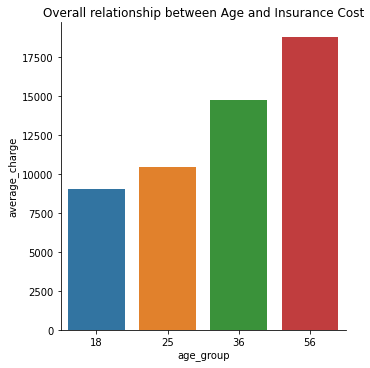

In [86]:
#sorting data by age group

youth_data = data[(data.age >= 18) & (data.age <= 24)]
young_adult_data = data[(data.age >= 25) & (data.age <= 35)]
adult_data = data[(data.age >= 36) & (data.age <= 55)]
elderly_data = data[data.age > 55]

#finding the average cost per age group
avg_y_cost = str(round(youth_data.charges.mean(), 2))
avg_ya_cost = str(round(young_adult_data.charges.mean(), 2))
avg_a_cost = str(round(adult_data.charges.mean(), 2))
avg_e_cost = str(round(elderly_data.charges.mean(), 2))

print('The average insurance cost for youths is $' + avg_y_cost)
print('The average insurance cost for young adults is $' + avg_ya_cost)
print('The average insurance cost for adults is $' + avg_a_cost)
print('The average insurance cost for elderly is $' + avg_e_cost)

age_charges_data = pd.DataFrame(
    {
        'age_group' : [18, 25, 36, 56],
        'average_charge' : [float(avg_y_cost), float(avg_ya_cost), float(avg_a_cost), float(avg_e_cost)]
    }
)
sns.catplot(x = 'age_group', y = 'average_charge', kind = 'bar', data = age_charges_data).set(title = 'Overall relationship between Age and Insurance Cost')

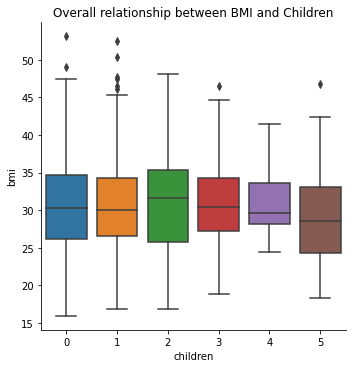

In [87]:
#sorting data by BMI
underweight_data = data[data['bmi'] < 18.5]
ideal_data = data[(data['bmi'] >= 18.5) & (data['bmi'] <= 24.9)]
overweight_data = data[(data['bmi'] >= 25) & (data['bmi'] <= 29.9)]
obese_data = data[(data['bmi'] <= 55)]

sns.catplot(x = 'children', y = 'bmi', kind = 'box', data = data).set(title = 'Overall relationship between BMI and Children')

The highest recorded insurance cost for a male is $62593
The highest recorded insurance cost for a female is $63770


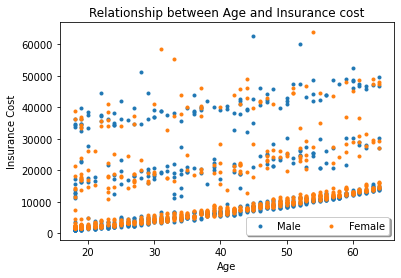

In [88]:
#sorting data by sex
male_data = data[data['sex'] == 'male']
female_data = data[data['sex'] == 'female']
print('The highest recorded insurance cost for a male is $' +  str(round(max(male_data.charges))))
print('The highest recorded insurance cost for a female is $' +  str(round(max(female_data.charges))))

plt.scatter(male_data.age, male_data.charges, marker = '.', label = 'Male')
plt.scatter(female_data.age, female_data.charges, marker = '.', label = 'Female')
plt.xlabel('Age')
plt.ylabel('Insurance Cost')
plt.title('Relationship between Age and Insurance cost')
plt.legend(frameon = True, loc = 'lower right', shadow = True, framealpha = 1, ncol = 2)

In [89]:
#finding the closest recorded insurance cost for patient zero
patient_zero_data = data[
                         (data['age'] == 21) & 
                         ((data['bmi'] < 30) & (data['bmi'] >= 27)) &
                         (data['sex'] == 'male') & 
                         (data['smoker'] == 'no') &
                         (data['children'] == 0) & 
                         (data['region'] == 'northwest')
]
print(patient_zero_data)
print('The closest and most relevant recorded insurance cost is $1906.36')

     age   sex     bmi  children smoker     region     charges
751   21  male  28.975         0     no  northwest  1906.35825
The closest and most relevant recorded insurance cost is $1906.36
